In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Ekman

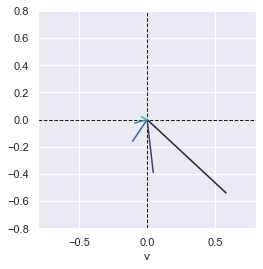

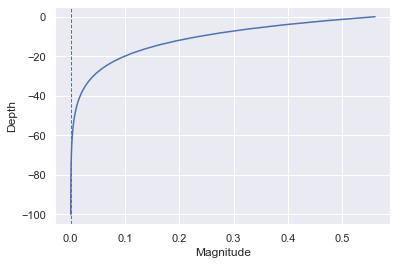

In [2]:
nu    = 1e-2
f     = 1e-4
omega = .5*f
delta = np.sqrt(nu/(omega+f))
tau0  = 1
rho0  = 1.03e3

z = np.linspace(0,-100)[:,None]
t = np.linspace(0,86400,120)[None,:]

z_prime = z/(np.sqrt(2)*delta)
t_prime = omega * t

A   = tau0 * delta / (np.sqrt(2) * rho0 * nu) * np.exp(z_prime)
x   = z_prime+t_prime
u   = A * (np.sin(x) + np.cos(x))
v   = A * (np.sin(x) - np.cos(x))

ti=1
colors = seaborn.color_palette('mako')
fig,ax = plt.subplots()
ax.set_aspect('equal')
ax.axhline(0, ls='--',lw=1, c='k')
ax.axvline(0, ls='--',lw=1, c='k')
ax.set_xlabel('u')
ax.set_xlabel('v')
ax.set_xlim([-.8,.8])
ax.set_ylim([-.8,.8])
for ci, i in enumerate(np.arange(0, len(u[:20,ti]), 4)):
    ax.plot([0,u[i,ti]],[0,v[i,ti]], c=colors[ci])
plt.show()

fig,ax = plt.subplots()
ax.plot(A, z)
ax.set_xlabel('Magnitude')
ax.set_ylabel('Depth')
ax.axvline(0,ls='--',lw=1)
plt.show()

Buoyancy

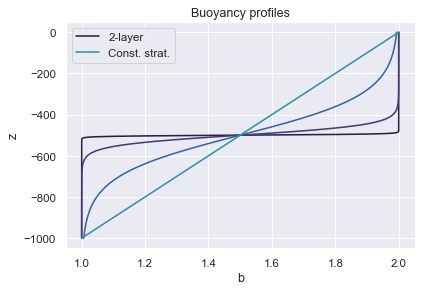

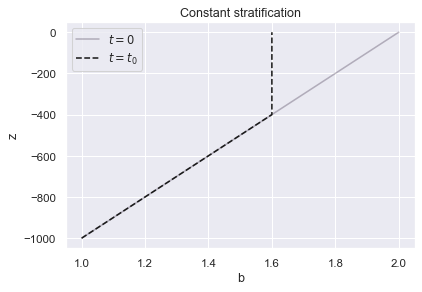

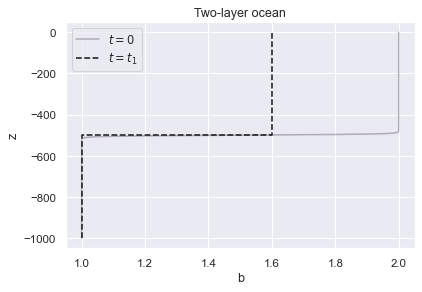

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75
H         = 1000  # height of domain, in meters
z_f       = np.linspace(-H, 0, 1000)
a = 1
b = 2
z_ml = -500

kappa = lambda w : .5*(a + b + (b-a) *np.tanh((z_f-z_ml)/w))
k0 = kappa(5)
k1 = kappa(50)
k2 = kappa(200)
k3 = z_f/1000 + 2
colors = seaborn.color_palette('mako')
labels = ['2-layer',None,None,'Const. strat.']
fig,ax = plt.subplots()
for i, k in enumerate([k0, k1, k2, k3]):
    ax.plot(k, z_f, c=colors[i], label=labels[i])
ax.set_xlabel('b')
ax.set_ylabel('z')
ax.set_title('Buoyancy profiles')
ax.legend()
plt.show()

fig,ax = plt.subplots()
for i, k in enumerate([k3]):
    ax.plot(k, z_f, c=colors[i], alpha=.3, label=r'$t=0$')
ax.plot([1.,1.6,1.6,],[-1000,-400,0], ls='--', c='k', label=r'$t=t_0$')
ax.set_xlabel('b')
ax.set_ylabel('z')
ax.set_title('Constant stratification')
ax.legend()
plt.show()

fig,ax = plt.subplots()
for i, k in enumerate([k0]):
    ax.plot(k, z_f, c=colors[i], alpha=.3, label=r'$t=0$')
ax.plot([1,1,1.6,1.6],[-1000,-500,-500,0], ls='--', c='k', label=r'$t=t_1$')
ax.set_xlabel('b')
ax.set_ylabel('z')
ax.set_title('Two-layer ocean')
ax.legend()
plt.show()

# P5

In [217]:
import scipy.io as sio
import cmocean
import gsw
data = sio.loadmat('ADELIE.mat')

T = data['adelie_temp']
SP = data['adelie_salt']
p = data['adelie_pres']
lat = data['ctdlat'].flatten()
lon = data['ctdlon'].flatten()

# Compute derived variables using GSW
SA = gsw.SA_from_SP(SP, p, lon, lat)
CT = gsw.CT_from_t(SA, T, p)

# For easier plotting, only take one pressure array
dist = gsw.distance(lon, lat,p=0).flatten()
dist = np.cumsum(np.insert(dist,0,0))
p    = p[:,-1]
nan_idx = np.isnan(p)
SP = SP[~nan_idx]
T  = T[~nan_idx]
CT = CT[~nan_idx]
SA = SA[~nan_idx]
p  = p[~nan_idx]

(gsw.sigma2(SA,CT) - gsw.pot_rho_t_exact(SA, T, p=p[:,None], p_ref=2000)+1000)[i]

array([[            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan, -1.39397408e-04, -1.16731434e-04,
        -9.62216482e-05, -9.61244539e-05, -9.36747040e-05,
        -9.35747883e-05, -9.87778224e-05, -9.34993666e-05,
        -9.56076879e-05]])

In [211]:
SA.shape

(2120, 19)

Potential temperature and density

In [87]:
np.nanmin(gsw.rho(SA, CT, p[:,None]) - gsw.pot_rho_t_exact(SA, T, p=p[:,None], p_ref=p[:,None]))

-0.00023026246071822243

In [88]:
theta   = gsw.pt_from_CT(SA, CT)
sigma_0 = gsw.sigma0(SA,CT)
sigma_2 = gsw.sigma2(SA,CT)
sigma_4 = gsw.sigma4(SA,CT)

In [57]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=75

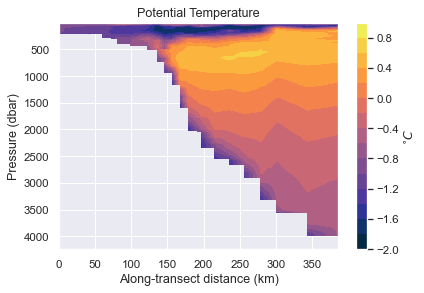

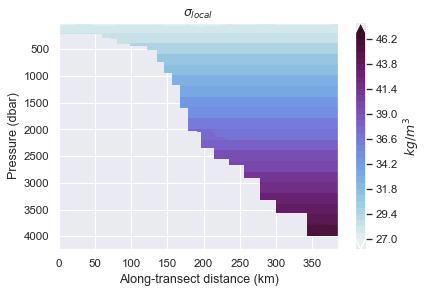

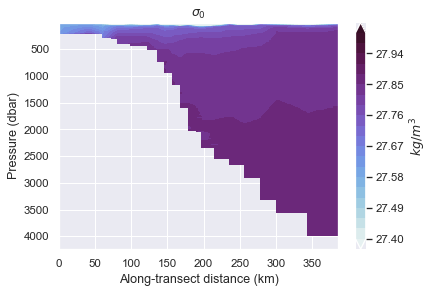

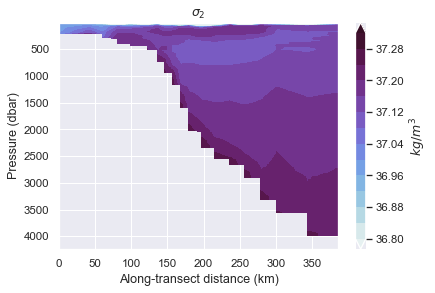

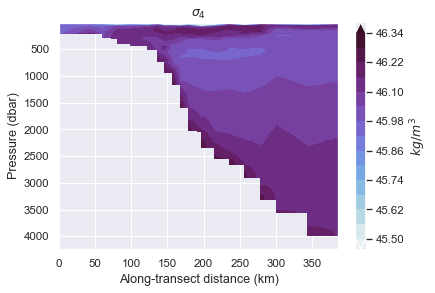

In [59]:
fig,ax = plt.subplots()
plot = ax.contourf(dist/1000, p, theta, levels=np.arange(-2,1.2,.2), cmap='cmo.thermal')
cb   = fig.colorbar(plot, orientation='vertical', label=r'$^{\circ}C$')
plt.gca().invert_yaxis()
ax.set_xlabel('Along-transect distance (km)')
ax.set_ylabel('Pressure (dbar)')
ax.set_title(r'Potential Temperature')
plt.show()


fig,ax = plt.subplots()
plot = ax.contourf(dist/1000, p, sigma_local, cmap='cmo.dense', levels=35,
                  extend='both')
cb   = fig.colorbar(plot, orientation='vertical', label=r'$kg/m^3$')
plt.gca().invert_yaxis()
ax.set_xlabel('Along-transect distance (km)')
ax.set_ylabel('Pressure (dbar)')
ax.set_title(r'$\sigma_{local}$')
plt.show()


fig,ax = plt.subplots()
plot = ax.contourf(dist/1000, p, sigma_0, cmap='cmo.dense', levels=np.arange(27.4,28.0,.03),
                  extend='both')
cb   = fig.colorbar(plot, orientation='vertical', label=r'$kg/m^3$')
plt.gca().invert_yaxis()
ax.set_xlabel('Along-transect distance (km)')
ax.set_ylabel('Pressure (dbar)')
ax.set_title(r'$\sigma_0$')
plt.show()

fig,ax = plt.subplots()
plot = ax.contourf(dist/1000, p, sigma_2, cmap='cmo.dense', levels=np.arange(36.8,37.34,.04),
                  extend='both')
cb   = fig.colorbar(plot, orientation='vertical', label=r'$kg/m^3$')
plt.gca().invert_yaxis()
ax.set_xlabel('Along-transect distance (km)')
ax.set_ylabel('Pressure (dbar)')
ax.set_title(r'$\sigma_2$')
plt.show()

fig,ax = plt.subplots()
plot = ax.contourf(dist/1000, p, sigma_4, cmap='cmo.dense', levels=np.arange(45.5,46.4,.06),
                  extend='both')
cb   = fig.colorbar(plot, orientation='vertical', label=r'$kg/m^3$')
plt.gca().invert_yaxis()
ax.set_xlabel('Along-transect distance (km)')
ax.set_ylabel('Pressure (dbar)')
ax.set_title(r'$\sigma_4$')
plt.show()

Estimate slope using central difference:
\begin{align*}
    f'(x) \approx \frac{f\left(x+\Delta x\right)-f\left(x-\Delta x\right)}{2\Delta x}
\end{align*}

In [8]:
import pandas as pd
import xarray as xr
from tqdm import tqdm
def get_iso_np(data, x):
    '''Given a dataset and the value of an isopycnal/therm, get coordinates of isopycnal/therm'''
    levels = np.array([x])
    idx = np.where(levels==x)[0].item()
    plot = plt.contour(dist, p, data, levels=levels)
    plt.close()
    c = plot.allsegs[idx][np.argmax([len(y) for y in plot.allsegs[idx]])]
    return c

def get_iso_xr(iso):
    '''Convert isoline to xarray'''
    iso = xr.DataArray(iso[:,1], coords={'dist':pd.Index(iso[:,0])}, dims=['dist'])
    iso = iso.drop_duplicates('dist').interp(dist=dist)
    return iso

def get_iso(data,x):
    '''Combines get_iso_xr and get_iso_np'''
    return get_iso_xr(get_iso_np(data,x))

def get_xgrad(iso):
    '''Compute horizontal gradient of the isoline'''
    return iso.differentiate('dist') / 1000 # convert from km to m

### Get coordinates of isopycnals
f = sigma_0[::10,12] # get isopycnals at 12 station along transect
f = f[~np.isnan(f)]
iso_all = [get_iso(sigma_0, x=fi) for fi in tqdm(f)]
iso_all = xr.concat(iso_all, dim=pd.Index(f,name='isopycnal'))
iso_grad = -iso_all.differentiate('dist') # negative sign because depth decreases with increasing pressure

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 127/127 [00:01<00:00, 102.84it/s]


Plot slope as a function of depth

In [253]:
import xarray as xr
def get_dzdx(sigma, p=p, dist=dist):
    '''Get dzdx along potential density surface'''
    sigma_xr = xr.DataArray(sigma, coords={'p':p, 'dist':dist}, dims=['p','dist'])
    dsigma_dx =  sigma_xr.differentiate('dist')
    dsigma_dz = -sigma_xr.differentiate('p') # negative sign because pressure decreases with z
    dzdx = -dsigma_dx/dsigma_dz
    return dzdx

def get_sigma_local(Np):
    '''Get locally referenced sigma, based on specified pressure spacing'''
    p_local     = np.repeat(p[::Np], Np)[:len(p)]
    sigma_local = gsw.pot_rho_t_exact(SA, T, p=p[:,None], p_ref=p_local[:,None])-1000
    return sigma_local



N = 10
dzdx0 = get_dzdx(sigma_0[::N], p[::N])
dzdx2 = get_dzdx(sigma_2[::N], p[::N])
dzdx4 = get_dzdx(sigma_4[::N], p[::N])

Np_vals = [1, 100, 200, 230]
sigma_local = {i : get_sigma_local(i) for i in Np_vals}
dzdx_local  = {i : get_dzdx(sigma_local[i][::N], p[::N]) for i in Np_vals}

array([1.000e+00, 4.610e+02, 9.210e+02, 1.381e+03, 1.841e+03, 2.301e+03,
       2.761e+03, 3.221e+03, 3.681e+03, 4.141e+03])

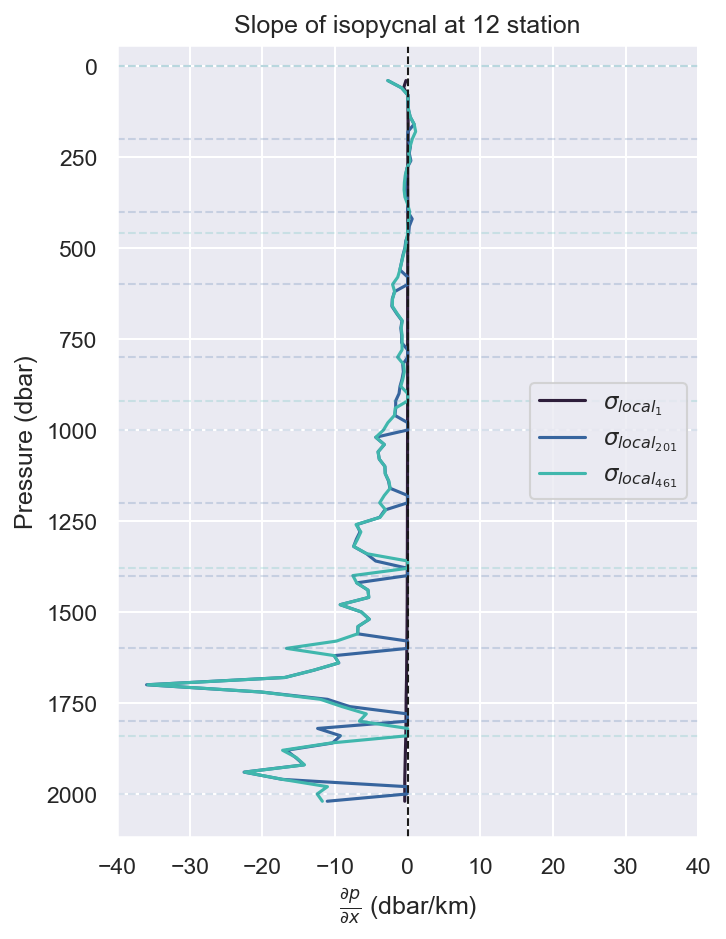

In [263]:
mpl.rcParams['figure.dpi']=150
fig,ax = plt.subplots(figsize=(5,7))
ax.set_xlim([-40,40])
# ax.set_xlim([-.75,.75])
colors = seaborn.color_palette('mako')
ax.plot(dzdx_local[1].isel(dist=11)*1000, dzdx_local[1].p, c=colors[0], label=r'$\sigma_{local_1}$')
ax.plot(dzdx_local[100].isel(dist=11)*1000, dzdx_local[1].p, c=colors[2],  label=r'$\sigma_{local_{201}}$')
ax.plot(dzdx_local[230].isel(dist=11)*1000, dzdx_local[1].p, c=colors[4],  label=r'$\sigma_{local_{461}}$')
# ax.plot(dzdx0.isel(dist=11)*1000,      dzdx0.p, c=colors[0], label=r'$\sigma_0$')
# ax.plot(dzdx2.isel(dist=11)*1000,      dzdx2.p, c=colors[1], label=r'$\sigma_2$')
# ax.plot(dzdx4.isel(dist=11)*1000,      dzdx4.p, c=colors[2], label=r'$\sigma_4$')
for i in p[:1001:100]:
    ax.axhline(i, ls='--',alpha=.2,c=colors[2], lw=1)
for i in p[:1001:230]:
    ax.axhline(i, ls='--',alpha=.2,c=colors[4], lw=1)

ax.axvline(0, ls='--',lw=1,c='k')
# ax.set_xlim([-2,2])
ax.set_xlabel(r'$\frac{\partial p}{\partial x}$ (dbar/km)')
ax.set_ylabel('Pressure (dbar)')
ax.set_title('Slope of isopycnal at 12 station')
ax.legend()
plt.gca().invert_yaxis()
plt.show()

## check that slope computation works

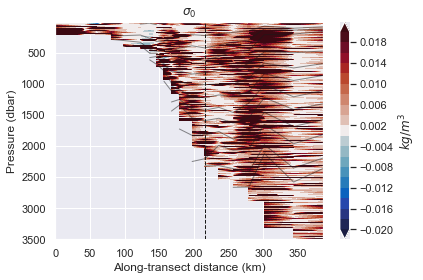

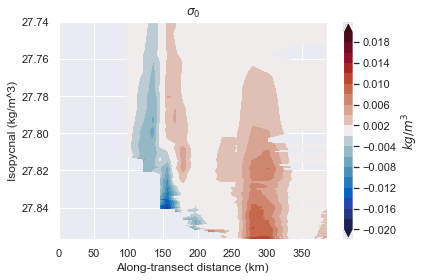

In [15]:
from gen_utils import make_cb_range

## Mason's version
fig,ax = plt.subplots()
plot = ax.contourf(dist/1000, dzdx0.p, dzdx0, cmap='cmo.balance', levels=make_cb_range(.02,.002),
                  extend='both')
ax.axvline(dist[12]/1000, ls='--',c='k',zorder=10, lw=1)
for i in iso_all.isopycnal.values[::10]:
    ax.plot(iso_all.dist/1000, iso_all.sel(isopycnal=i), c='k', ls='-', lw=1, alpha=.5)
cb   = fig.colorbar(plot, orientation='vertical', label=r'$kg/m^3$')
ax.set_ylim([None,3500])
plt.gca().invert_yaxis()
ax.set_xlabel('Along-transect distance (km)')
ax.set_ylabel('Pressure (dbar)')
ax.set_title(r'$\sigma_0$')
plt.show()

## Custom version
fig,ax = plt.subplots()
plot = ax.contourf(iso_grad.dist/1000, iso_grad.isopycnal, iso_grad, cmap='cmo.balance', 
                   levels=make_cb_range(.02,.002), extend='both')
cb   = fig.colorbar(plot, orientation='vertical', label=r'$kg/m^3$')
ax.set_xlabel('Along-transect distance (km)')
ax.set_ylabel('Isopycnal (kg/m^3)')
ax.set_title(r'$\sigma_0$')
ax.set_ylim([27.74,None])
plt.gca().invert_yaxis()
plt.show()

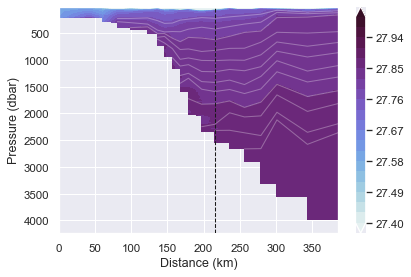

In [97]:
mpl.rcParams['figure.dpi'] = 75

iso   = get_iso(sigma_0, x=27.85) # compute depth of isoline
fig,ax = plt.subplots()
plot = ax.contourf(dist/1000, p, sigma_0, cmap='cmo.dense', levels=np.arange(27.4,28.0,.03),
                  extend='both')
cb   = fig.colorbar(plot, orientation='vertical')

ax.axvline(dist[12]/1000, ls='--',c='k',zorder=10, lw=1)
# for i in iso_all[::10]:
for i in iso_all.isopycnal.values[::10]:
    ax.plot(iso_all.dist/1000, iso_all.sel(isopycnal=i), c='white', ls='-', lw=1, alpha=.3)
ax.set_ylabel('Pressure (dbar)')
ax.set_xlabel('Distance (km)')
plt.gca().invert_yaxis() # reverse order of y axis so that depth decreases going down
plt.show()

### Plot required quantity
# fig,ax = plt.subplots()
# ax.plot(iso_grad.)
# ax.set_ylabel('Pressure (dbar)')
# ax.set_xlabel('Distance (km)')
# plt.gca().invert_yaxis() # reverse order of y axis so that depth decreases going down
# plt.show()